# Homework 4: HMM (Hidden Markov Model)
Ad Soyad: Önder Görmez  
Öğrenci No: 21501035

# Soru 1
Hidden Markov Model (HMM) nedir?

## Markov Property
> In probability theory and statistics, the term Markov property refers to the memoryless property of a stochastic process, which means that its future evolution is independent of its history. [2]

## Hidden Markov model
> A hidden Markov model (HMM) is a Markov model in which the observations are dependent on a latent (or "hidden") Markov process (referred to as X). An HMM requires that there be an observable process Y whose outcomes depend on the outcomes of X in a known way. Since X cannot be observed directly, the goal is to learn about state of X by observing Y. [3]


> A Markov chain is useful when we need to compute a probability for a sequence of observable events. In many cases, however, the events we are interested in are **hidden**: we don’t observe them directly. For example we don’t normally observe part-of-speech tags in a text. Rather, we see words, and must infer the tags from the word sequence. We call the tags **hidden** because they are not observed.
> 
> A **hidden Markov model (HMM)** allows us to talk about both observed events (like words that we see in the input) and hidden events (like part-of-speech tags) that we think of as causal factors in our probabilistic model. An HMM is specified by the following components:
> 
> ![](image_1.png)
> 
> [5]


# Soru 2
* Hidden Markov Model (HMM) ile ilgili örnek bir uygulama oluşturunuz.
* Sonuçları değerlendiriniz.


In [610]:
#!/usr/bin/python3

import numpy as numpy
import pandas as pandas
import networkx as networkx
import pygraphviz as pygraphviz
from IPython.display import Image, display


Basitçe bir bebeğin yaptığı hareketler üzerinden bir tahminleme yapmak istersek;
* Oyun oynama
* Yemek yeme
* Uyuma
* Tuvalet ihtiyacı
* Ağlama

Başka bir durum olmadığını varsayarsak yukarıdaki durumların toplam olasılığı 1 olmalıdır.

In [611]:
baby_states = ['playing', 'eating', 'sleeping', 'pooping', 'crying']
initial_probabilities = [0.10, 0.15, 0.4, 0.10, 0.25]
state_space = pandas.Series(initial_probabilities, index=baby_states, name='states')

print("Total probability of all states: ", state_space.sum())
state_space


Total probability of all states:  1.0


playing     0.10
eating      0.15
sleeping    0.40
pooping     0.10
crying      0.25
Name: states, dtype: float64

# Transition Matrix (Durum Geçiş Matrisi)
* Bebek bir durumdayken diğerine geçişinin olasılığı da belirli kurallara bağlıdır.
* Yukarıda 5 durumumuz var. Bu durumlardan bir tanesini ele aldığımızda;
  * Diğer 4 durumun arkasından gelme olasılıkları toplamı 1 olmalıdır.
  * Örneğin bebek uyuyorsa, uyandığında ağlama olasılığı diğer olasılıklardan (oynama, yeme, ...) daha büyüktür.


In [612]:
transition_matrix_df = pandas.DataFrame(columns=baby_states, index=baby_states)

# baby_states          -->              playing  eating  sleeping  pooping  crying
transition_matrix_df.loc['playing'] =  [0.2,     0.2,    0.05,     0.15,    0.4]
transition_matrix_df.loc['eating'] =   [0.1,     0.2,    0.4,      0.1,     0.2]
transition_matrix_df.loc['sleeping'] = [0.0,     0.2,    0.35,     0.05,    0.4]
transition_matrix_df.loc['pooping'] =  [0.1,     0.35,   0.0,      0.25,    0.3]
transition_matrix_df.loc['crying'] =   [0.1,     0.25,   0.25,     0.1,     0.3]

print(transition_matrix_df.sum(axis=1))

print("\n\nTransition matrix size: ", transition_matrix_df.shape)
transition_matrix_df


playing     1.0
eating      1.0
sleeping    1.0
pooping     1.0
crying      1.0
dtype: float64


Transition matrix size:  (5, 5)


,playing,eating,sleeping,pooping,crying
playing,0.2,0.2,0.05,0.15,0.4
eating,0.1,0.2,0.4,0.1,0.2
sleeping,0.0,0.2,0.35,0.05,0.4
pooping,0.1,0.35,0.0,0.25,0.3
crying,0.1,0.25,0.25,0.1,0.3


In [613]:
# NOTE: Used without modification from reference [1]
from pprint import pprint

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges


# Markov Edges
Graf çizdirilirken kullanılacak olan edge'lerin olasılıkları aşağıdaki gibidir.

In [614]:
print("Baby markov edges:")
markov_edges = _get_markov_edges(transition_matrix_df)
markov_edges


Baby markov edges:


{('playing', 'playing'): 0.2,
 ('eating', 'playing'): 0.1,
 ('sleeping', 'playing'): 0.0,
 ('pooping', 'playing'): 0.1,
 ('crying', 'playing'): 0.1,
 ('playing', 'eating'): 0.2,
 ('eating', 'eating'): 0.2,
 ('sleeping', 'eating'): 0.2,
 ('pooping', 'eating'): 0.35,
 ('crying', 'eating'): 0.25,
 ('playing', 'sleeping'): 0.05,
 ('eating', 'sleeping'): 0.4,
 ('sleeping', 'sleeping'): 0.35,
 ('pooping', 'sleeping'): 0.0,
 ('crying', 'sleeping'): 0.25,
 ('playing', 'pooping'): 0.15,
 ('eating', 'pooping'): 0.1,
 ('sleeping', 'pooping'): 0.05,
 ('pooping', 'pooping'): 0.25,
 ('crying', 'pooping'): 0.1,
 ('playing', 'crying'): 0.4,
 ('eating', 'crying'): 0.2,
 ('sleeping', 'crying'): 0.4,
 ('pooping', 'crying'): 0.3,
 ('crying', 'crying'): 0.3}

# Graph
* Yukarıda elde edilen datalardan yararlanırsak aşağıdaki gibi bir graf çizdirilir.

Nodes:
['playing', 'eating', 'sleeping', 'pooping', 'crying']
Edges:
[('playing', 'playing', {'weight': 0.2, 'label': 0.2}), ('playing', 'eating', {'weight': 0.2, 'label': 0.2}), ('playing', 'sleeping', {'weight': 0.05, 'label': 0.05}), ('playing', 'pooping', {'weight': 0.15, 'label': 0.15}), ('playing', 'crying', {'weight': 0.4, 'label': 0.4}), ('eating', 'playing', {'weight': 0.1, 'label': 0.1}), ('eating', 'eating', {'weight': 0.2, 'label': 0.2}), ('eating', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('eating', 'pooping', {'weight': 0.1, 'label': 0.1}), ('eating', 'crying', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'playing', {'weight': 0.0, 'label': 0.0}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'sleeping', {'weight': 0.35, 'label': 0.35}), ('sleeping', 'pooping', {'weight': 0.05, 'label': 0.05}), ('sleeping', 'crying', {'weight': 0.4, 'label': 0.4}), ('pooping', 'playing', {'weight': 0.1, 'label': 0.1}), ('pooping', 'eating', {'weight': 0.35, 'label

/tmp/ipykernel_7354/3603561849.py:20: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which has known issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  pydot = networkx.drawing.nx_pydot.to_pydot(baby_graph)


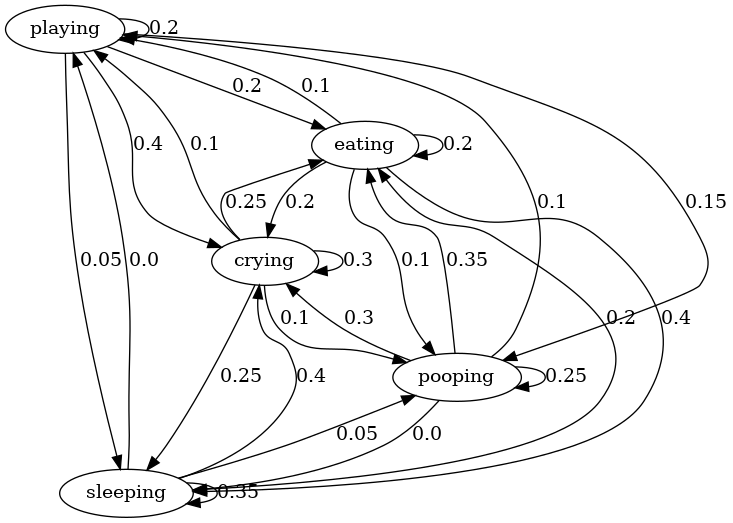

In [615]:
baby_graph = networkx.MultiDiGraph()

# add baby states as nodes
baby_graph.add_nodes_from(baby_states)
print("Nodes:")
print(baby_graph.nodes())

# add edges to the graph
for (from_state, to_state), probability in markov_edges.items():
    baby_graph.add_edge(from_state, to_state, weight=probability, label=probability)

print("Edges:")
print(baby_graph.edges(data=True))

# NOTE: Creating a permanent image file from the dot file
# networkx.drawing.nx_pydot.write_dot(baby_graph, 'baby_markov.dot')
# onder@Onder-Dell-G15-5520:~/.../Homework4$ dot -Tps baby_markov.dot -o baby_markov.ps

# Creating on the fly image file from the dot file
pydot = networkx.drawing.nx_pydot.to_pydot(baby_graph)
baby_graph_image = Image(pydot.create_png())
display(baby_graph_image)


# What Makes a Markov Model Hidden?

Markov Model inin hidden olmasının sebebi, önceden tanımlamadığımız durumların doğrudan görünmemesidir/gözlemlenememesidir. Durum geçişleri ve gözlemlenebilir olasılıklar, bir sekans ile birleştirildiğinde oluşabilecek gizli durumlar hakkında bize bilgi verir.
* Örneğin, bir bebeğin garip davranışlarının olduğu bir durum düşünün. Bebeğin davranışlarının hastalıktan mı yoksa sağlıklı olduğu zamanlarda garip davranışlar mı olduğunu modellemek istiyorsunuz.
* Bu durumda sağlıklı veya hasta olma durumları mevcut durumların ardında gizli bir durum olacaktır.

## Hidden States
Bebeğin gizli durumları aşağıdaki gibidir.
* Hasta
* Sağlıklı

Bu durumlar hakkında herhangi bir bilgiye sahip olmadığımız için diğer durumların arka arkaya gelmesi ile bir pattern elde edebiliriz.
* Bu patternlerin sonucuna göre sağlıklı veya hasta olduğunu tahmin edebiliriz.

In [616]:
hidden_baby_states = ['healthy', 'sick']
initial_hidden_probabilities = [0.5, 0.5]

state_space = pandas.Series(initial_hidden_probabilities, index=hidden_baby_states, name='states')

print("Total probability of all hidden states: ", state_space.sum())
state_space


Total probability of all hidden states:  1.0


healthy    0.5
sick       0.5
Name: states, dtype: float64

# Transition Matrix of Hidden States (Gizli Durumlar Geçiş Matrisi)
* Yukarıda 2 durumumuz var. Bu durumlardan bir tanesini ele aldığımızda;
  * Diğer 1 durumun arkasından gelme olasılıkları toplamı 1 olmalıdır.

In [617]:
hidden_transition_matrix_df = pandas.DataFrame(columns=hidden_baby_states, index=hidden_baby_states)

# hidden_baby_states    -->                   healthy  sick
hidden_transition_matrix_df.loc['healthy'] = [0.8,     0.2]
hidden_transition_matrix_df.loc['sick'] =    [0.4,     0.6]

hidden_transition_matrix = hidden_transition_matrix_df.values

print(hidden_transition_matrix_df.sum(axis=1))


print("\n\nHidden transition matrix size: ", hidden_transition_matrix.shape)
hidden_transition_matrix_df


healthy    1.0
sick       1.0
dtype: float64


Hidden transition matrix size:  (2, 2)


,healthy,sick
healthy,0.8,0.2
sick,0.4,0.6


# Observations
Daha önceden bildiğimiz durumlar ile gizli durumlar arasında bir bağlantı kurulabilir mi?
* Bu bağlantıyı temsil etmek için bir matris oluştururuz.
* Böylelikle ilk başta belirlenen 5 durumun bir biri arasındaki geçişlerin aslında gizli bir durumun sonucu olup olmadığını anlayabiliriz.
* Örneğin; bebeğin çok sık ağlaması veya çok sık tuvalet ihtiyacı oluşması, bebeğin hasta olduğunu anlamamızı sağlayabilir.

In [618]:
observable_baby_states = baby_states

relation_matrix_df = pandas.DataFrame(columns=observable_baby_states, index=hidden_baby_states)
# observable_baby_states -->        playing  eating  sleeping  pooping  crying
relation_matrix_df.loc['healthy'] = [0.2,    0.2,    0.2,      0.2,     0.2]
relation_matrix_df.loc['sick'] =    [0.0,    0.05,    0.2,     0.35,     0.4]

relation_matrix = relation_matrix_df.values

print(relation_matrix_df.sum(axis=1))

print("\n\nReleation matrix size: ", relation_matrix_df.shape)
relation_matrix_df


healthy    1.0
sick       1.0
dtype: float64


Releation matrix size:  (2, 5)


,playing,eating,sleeping,pooping,crying
healthy,0.2,0.2,0.2,0.2,0.2
sick,0.0,0.05,0.2,0.35,0.4


# Observation Relation Graph

Yukarıda verdiğimiz matrisle aslında olasılıksal olarak bir bağlantı kurmuş oluyoruz.
* Bebek eğer sağlıklıyla 5 durumun 5 ine de geçiş olasılığı eşittir.
* Bebek eğer hasta ise genelde ağlar veya tuvalet ihtiyacı olur.
* Sonuçlardan beklentimiz ard arda ağlıyor veya tuvalet ihtiyacı varsa bebeğin hasta olduğunun tahmin edilmesidir.

In [619]:
hidden_markov_edges = _get_markov_edges(hidden_transition_matrix_df)
pprint(hidden_markov_edges)

relation_markov_edges = _get_markov_edges(relation_matrix_df)
pprint(relation_markov_edges)


{('healthy', 'healthy'): 0.8,
 ('healthy', 'sick'): 0.2,
 ('sick', 'healthy'): 0.4,
 ('sick', 'sick'): 0.6}
{('healthy', 'crying'): 0.2,
 ('healthy', 'eating'): 0.2,
 ('healthy', 'playing'): 0.2,
 ('healthy', 'pooping'): 0.2,
 ('healthy', 'sleeping'): 0.2,
 ('sick', 'crying'): 0.4,
 ('sick', 'eating'): 0.05,
 ('sick', 'playing'): 0.0,
 ('sick', 'pooping'): 0.35,
 ('sick', 'sleeping'): 0.2}


Aşağıda kenarların çıkarılması ile elde edilen grafik gösterilmiştir.

Nodes:
['healthy', 'sick']
Edges:
[('healthy', 'healthy', {'weight': 0.8, 'label': 0.8}), ('healthy', 'sick', {'weight': 0.2, 'label': 0.2}), ('healthy', 'playing', {'weight': 0.2, 'label': 0.2}), ('healthy', 'eating', {'weight': 0.2, 'label': 0.2}), ('healthy', 'sleeping', {'weight': 0.2, 'label': 0.2}), ('healthy', 'pooping', {'weight': 0.2, 'label': 0.2}), ('healthy', 'crying', {'weight': 0.2, 'label': 0.2}), ('sick', 'healthy', {'weight': 0.4, 'label': 0.4}), ('sick', 'sick', {'weight': 0.6, 'label': 0.6}), ('sick', 'playing', {'weight': 0.0, 'label': 0.0}), ('sick', 'eating', {'weight': 0.05, 'label': 0.05}), ('sick', 'sleeping', {'weight': 0.2, 'label': 0.2}), ('sick', 'pooping', {'weight': 0.35, 'label': 0.35}), ('sick', 'crying', {'weight': 0.4, 'label': 0.4})]


/tmp/ipykernel_7354/603944913.py:24: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which has known issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  pydot = networkx.drawing.nx_pydot.to_pydot(baby_hidden_and_observed_graph)


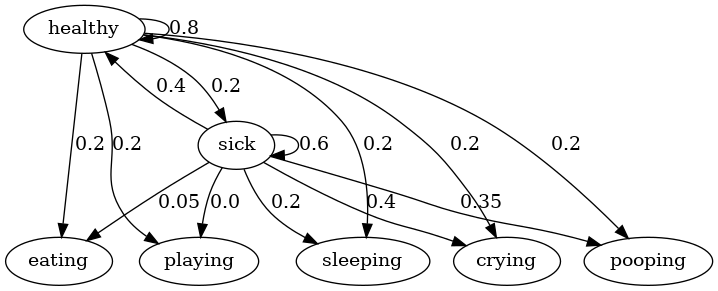

In [620]:
baby_hidden_and_observed_graph = networkx.MultiDiGraph()

# add baby hidden states as nodes
baby_hidden_and_observed_graph.add_nodes_from(hidden_baby_states)
print("Nodes:")
print(baby_hidden_and_observed_graph.nodes())

# add hidden edges to the graph
for (from_state, to_state), probability in hidden_markov_edges.items():
    baby_hidden_and_observed_graph.add_edge(from_state, to_state, weight=probability, label=probability)

# add observed edges to the graph
for (from_state, to_state), probability in relation_markov_edges.items():
    baby_hidden_and_observed_graph.add_edge(from_state, to_state, weight=probability, label=probability)

print("Edges:")
print(baby_hidden_and_observed_graph.edges(data=True))

# NOTE: Creating a permanent image file from the dot file
# networkx.drawing.nx_pydot.write_dot(baby_hidden_and_observed_graph, 'baby_hidden_and_observed_markov.dot')
# onder@Onder-Dell-G15-5520:~/.../Homework4$ dot -Tps baby_hidden_and_observed_markov.dot -o baby_hidden_and_observed_markov.ps

# Creating on the fly image file from the dot file
pydot = networkx.drawing.nx_pydot.to_pydot(baby_hidden_and_observed_graph)
baby_hidden_and_observed_graph_image = Image(pydot.create_png())
display(baby_hidden_and_observed_graph_image)


# Observation of Sequences
Bebeğin belirlenen bir periyod içerisindeki davranışları izlenerek hasta veya sağlıklı olma durumu üzerinde tahminleme yapılacaktır.
* Bildiğimiz 5 durumun ard arda gelmesi ile ilgili pattern aşağıdaki gibi olsun.
* Buradan bebeğin hasta veya sağlıklı olma durumunu tahmin etmek istiyoruz.
* Beklentimiz belirlediğimiz olasılıklar nedeniyle çok fazla ağlıyorsa ve tuvalet ihtiyacı varsa bebeğin hasta olduğunun belirlenmesidir.

Bebeğin uzun bir aralıkta davranışı izleniyor aşağıdaki gibi bir matris elde ediliyor.

In [621]:
observation_map = {'playing':0, 'eating':1, 'sleeping':2, 'pooping':3, 'crying':4}
observations = numpy.array([0, 0, 0, 3, 1, 1, 2, 2,
                            2, 2, 2, 4, 0, 0, 4, 4,
                            4, 4, 4, 3, 3, 3, 3, 4,
                            4, 4, 4, 3, 3, 3, 3, 4,
                            0, 0, 0, 3, 1, 1, 2, 2,
                            0, 0, 0, 3, 1, 1, 2, 2,])

inv_obs_map = dict((obs_code, obs_name) for obs_name, obs_code in observation_map.items())
obs_seq = [inv_obs_map[obs_code] for obs_code in list(observations)]

obs_df = pandas.DataFrame(numpy.column_stack([observations, obs_seq]), columns=['obs_code', 'obs_seq'])
obs_df


,obs_code,obs_seq
0,0,playing
1,0,playing
2,0,playing
3,3,pooping
4,1,eating
5,1,eating
6,2,sleeping
7,2,sleeping
8,2,sleeping
9,2,sleeping


## Viterbi Algorithm
> Using the Viterbi algorithm we can identify the most likely sequence of hidden states given the sequence of observations.
> 
> High level, the Viterbi algorithm increments over each time step, finding the maximum probability of any path that gets to state iat time t, that also has the correct observations for the sequence up to time t.
> 
> The algorithm also keeps track of the state with the highest probability at each stage. At the end of the sequence, the algorithm will iterate backwards selecting the state that "won" each time step, and thus creating the most likely path, or likely sequence of hidden states that led to the sequence of observations. [1]

In [622]:
# NOTE: Used without modification from reference [1]
# Just changed code below for fixing run time errors
# path[t] = phi[path[t+1], [t+1]] --> path[t] = phi[int(path[t+1]), [t+1]]

import numpy as np

# define Viterbi algorithm for shortest path
# code adapted from Stephen Marsland's, Machine Learning An Algorthmic Perspective, Vol. 2
# https://github.com/alexsosn/MarslandMLAlgo/blob/master/Ch16/HMM.py

def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    #p('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    for t in range(T-2, -1, -1):
        path[t] = phi[int(path[t+1]), [t+1]]
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi


Viterbi algoritması ile bizim problemimize ait en olası gizli durumlar elde edilir.

In [623]:
# Viterbi Parameters
# pi --> initial_hidden_probabilities
# a --> hidden_transition_matrix
# b --> relation_matrix
# obs --> observations

path, delta, phi = viterbi(initial_hidden_probabilities, hidden_transition_matrix, relation_matrix, observations)



Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 0.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 0.0
s=0 and t=3: phi[0, 3] = 0.0
s=1 and t=3: phi[1, 3] = 0.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 1.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 0.0
s=0 and t=6: phi[0, 6] = 0.0
s=1 and t=6: phi[1, 6] = 0.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 0.0
s=0 and t=8: phi[0, 8] = 0.0
s=1 and t=8: phi[1, 8] = 0.0
s=0 and t=9: phi[0, 9] = 0.0
s=1 and t=9: phi[1, 9] = 0.0
s=0 and t=10: phi[0, 10] = 0.0
s=1 and t=10: phi[1, 10] = 0.0
s=0 and t=11: phi[0, 11] = 0.0
s=1 and t=11: phi[1, 11] = 0.0
s=0 and t=12: phi[0, 12] = 0.0
s=1 and t=12: phi[1, 12] = 1.0
s=0 and t=13: phi[0, 13] = 0.0
s=1 and t=13: phi[1, 13] = 0.0
s=0 and t=14: phi[0, 14] = 0.0
s=1 and t=14: phi[1, 14] = 0.0
s=0 and t=15: phi[0, 15] = 0.0
s=1 and t=15: phi[1, 15] = 1.0
s=0 and t=16: phi[0, 16] = 0.0
s=1 and t=16: phi[1, 16] = 1.0
s=0 and t=17: phi[0, 17

In [624]:
print('Most likely hidden states are:')
path


Most likely hidden states are:


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [625]:
print('Delta:')
delta


Delta:


array([[1.00000000e-01, 1.60000000e-02, 2.56000000e-03, 4.09600000e-04,
        6.55360000e-05, 1.04857600e-05, 1.67772160e-06, 2.68435456e-07,
        4.29496730e-08, 6.87194767e-09, 1.09951163e-09, 1.75921860e-10,
        2.81474977e-11, 4.50359963e-12, 7.20575940e-13, 1.15292150e-13,
        1.84467441e-14, 2.95147905e-15, 4.72236648e-16, 9.56279213e-17,
        2.00818635e-17, 4.21719133e-18, 8.85610179e-19, 1.85978138e-19,
        4.46347530e-20, 1.07123407e-20, 2.57096177e-21, 6.17030826e-22,
        1.29576473e-22, 2.72110594e-23, 5.71432248e-24, 1.20000772e-24,
        2.88001853e-25, 4.60802965e-26, 7.37284743e-27, 1.17965559e-27,
        1.88744894e-28, 3.01991831e-29, 4.83186929e-30, 7.73099087e-31,
        1.23695854e-31, 1.97913366e-32, 3.16661386e-33, 5.06658218e-34,
        8.10653148e-35, 1.29704504e-35, 2.07527206e-36, 3.32043530e-37],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.79200000e-04,
        5.37600000e-06, 6.55360000e-07, 4.19430400e-07, 6.71088

In [626]:
print('Phi:')
phi


Phi:


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

Gözlemler üzerinde yapılan çalışma sonucunda bebiğin hastalık sağlık durumu aşağıdaki gibi çıkmaktadır.

In [627]:
state_map = {0:'healthy', 1:'sick'}
state_path = [state_map[values] for values in path]

(pandas.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Hidden_Path_Label=state_path))


,Observation,Best_Hidden_Path_Label
0,playing,healthy
1,playing,healthy
2,playing,healthy
3,pooping,healthy
4,eating,healthy
5,eating,healthy
6,sleeping,healthy
7,sleeping,healthy
8,sleeping,healthy
9,sleeping,healthy


# Conclusion
* Yukarıdan görüldüğü gibi HMM ile **bebeğin sürekli ağlaması ve tuvalet ihtiyacının artması** durumunda **bebeğin hasta olduğunu tespit** edebilmekteyiz.
* Bu ve benzer durumlarda HMM kullanılarak mevcut durum hakkında sezgisel bilgiler (insights) elde edilebilir.
  * Örneğin bir uygulamanın normal log atması ve hata logu atması patternlerine bakılarak uygulamanın doğru çalışıp çalışmadığına karar verilebilir. 
  * Örneğin bir kullanıcının normal zamanda para çekme pattern i ile anormal bir durumda sürekli ve sık sık para çekme patterni üzerinden kullanıcının hesabının çalınmış olup olmadığına, bir dolandırıcılık durumu olup olmadığına karar verilebilir.
  * Örneğin yıl içerisinde alınan günlük yağış miktarı ve günlük su tüketimi gibi veriler analiz edilerek bir barajın taşma ihtimali olup olmadığına karar verilebilir. Böylelikle buna göre önlem alınabilir.


Yukarıdaki hasta ve sağlıklı etiketinde elde edilen sonuçlar beklentilerimize uygun olarak gerçekleşmiştir.



# Notlar

* Referans [1] kaynağında verilen kapsamlı örnek incelenmiştir. Buradaki çalışma yukarıda verilen bebeğin sağlık durumu tespiti problemine uyarlanmıştır.

# Referanslar

* [1] [Introduction to Hidden Markov Models with Python Networkx and Sklearn](https://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017)
  * NOTE: Some of the code is taken from this blog post and adapted to the homework related problem.
* [2] [Markov property](https://en.wikipedia.org/wiki/Markov_property)
* [3] [Hidden Markov model](https://en.wikipedia.org/wiki/Hidden_Markov_model)
* [4] [https://setosa.io/ev/markov-chains/](https://setosa.io/ev/markov-chains/)
* [5] [Stanford University - The Hidden Markov Model](https://web.stanford.edu/~jurafsky/slp3/A.pdf)